Original shape: (2461, 8)
                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  
<class 'pand

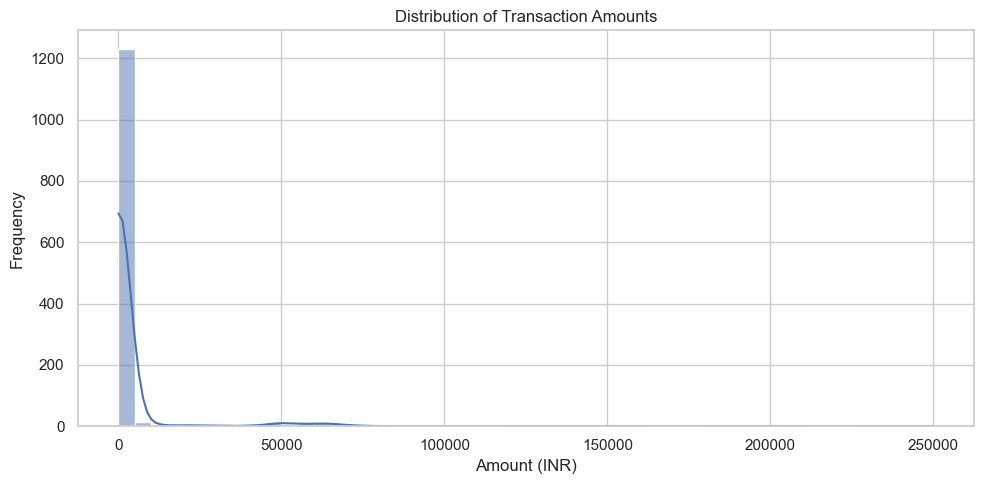

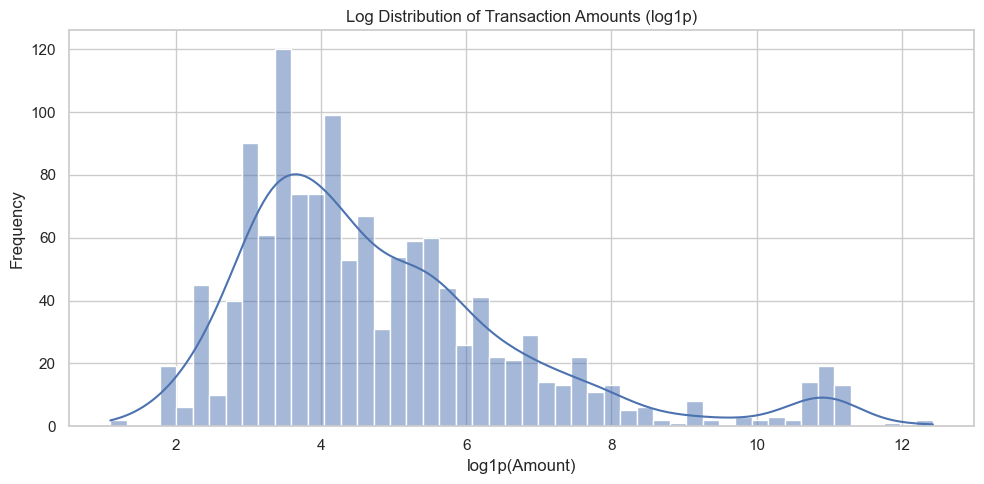


Transaction counts by Category:
Category
Food                         516
Transportation               199
Household                    127
subscription                  79
Other                         76
Health                        52
Salary                        42
Family                        41
Apparel                       29
Gift                          20
Beauty                        12
Festivals                     11
Interest                      10
Education                     10
Money transfer                 8
Gpay Reward                    8
Dividend earned on Shares      8
Saving Bank account 1          5
Bonus                          5
Culture                        5
maid                           5
Tourism                        4
Petty cash                     4
Maturity amount                3
Share Market                   3
Grooming                       3
Tax refund                     2
scrap                          2
Amazon pay cashback            2
I

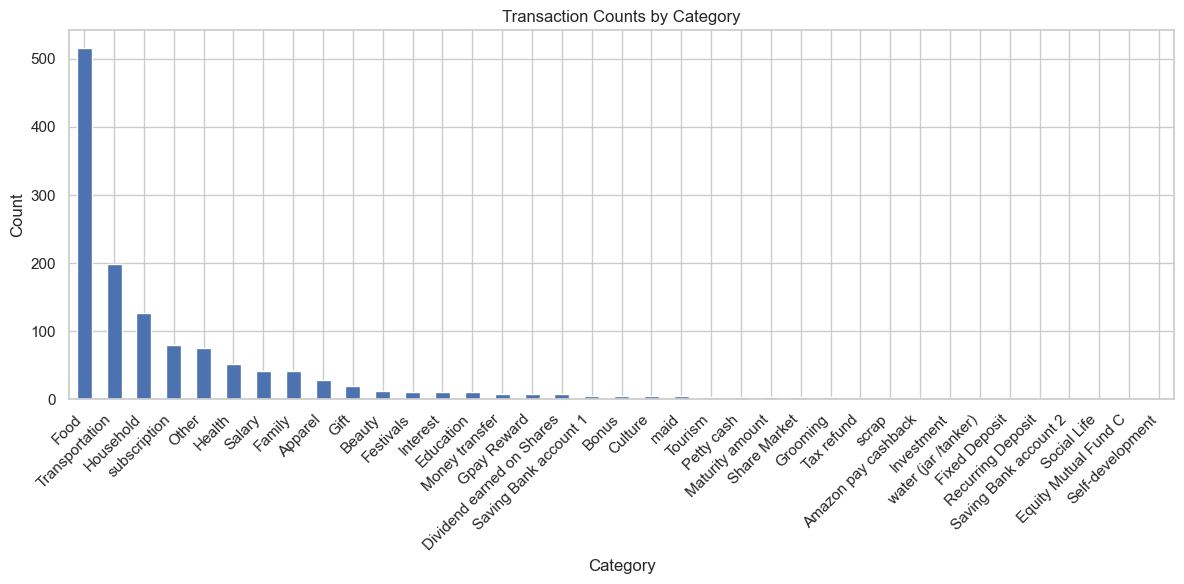


Transaction counts by Income/Expense:
Income/Expense
Expense         1199
Income            91
Transfer-Out      13
Name: count, dtype: int64


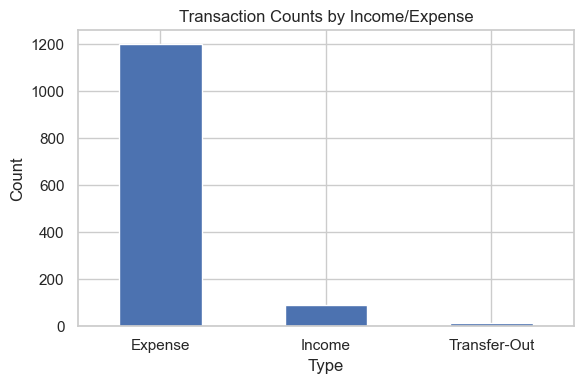

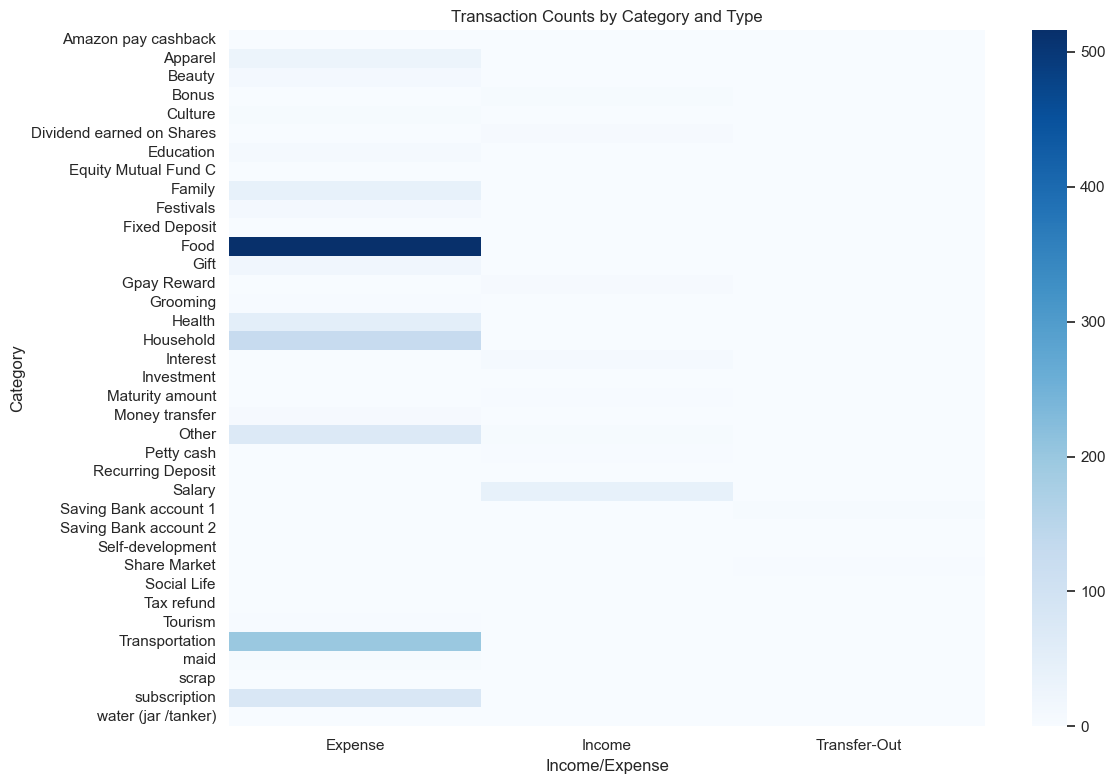


Correlation between Category (coded) and Amount: 0.09942842146612722


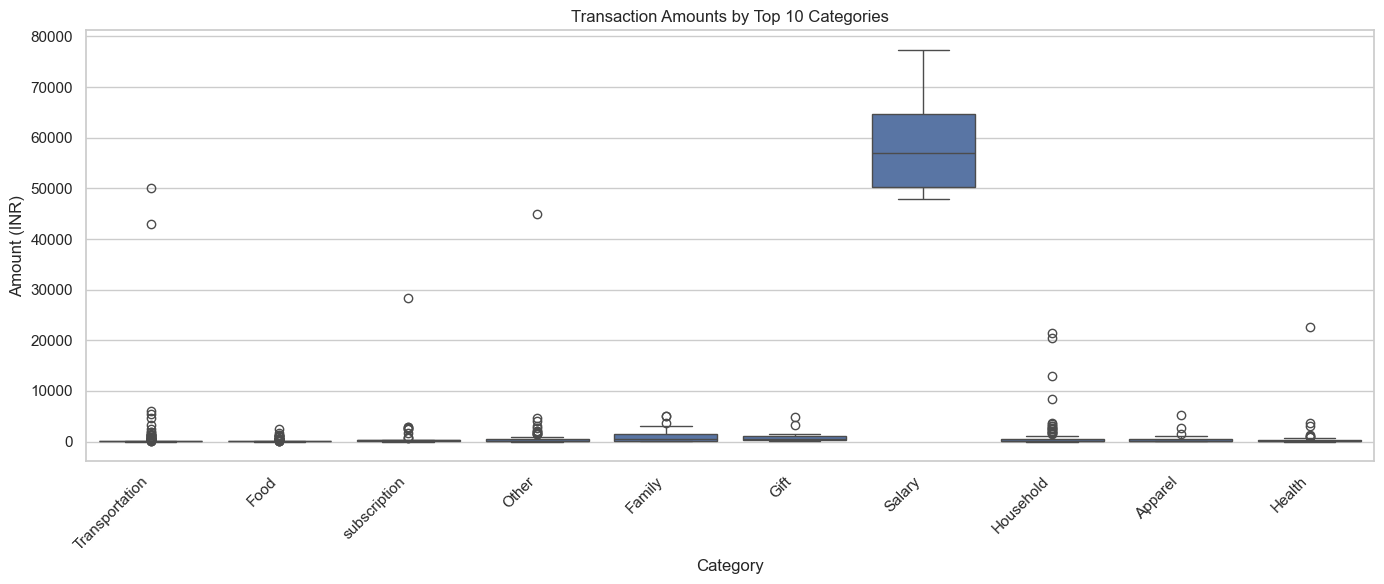

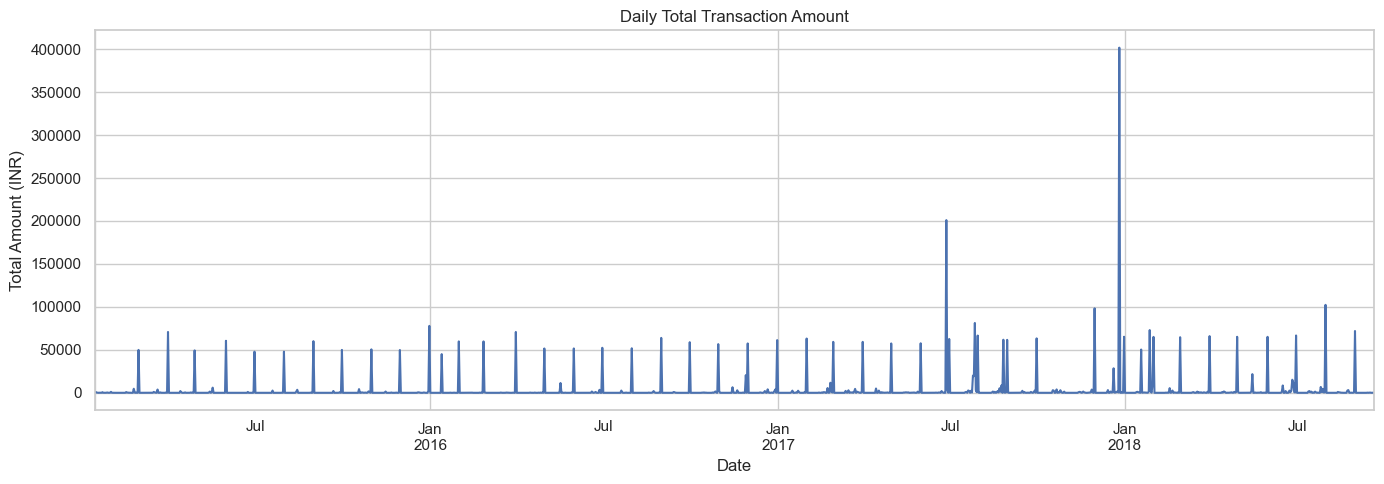

C:\Users\user\AppData\Local\Temp\ipykernel_10420\523270661.py:152: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_amount = df_ts["Amount"].resample("M").sum()


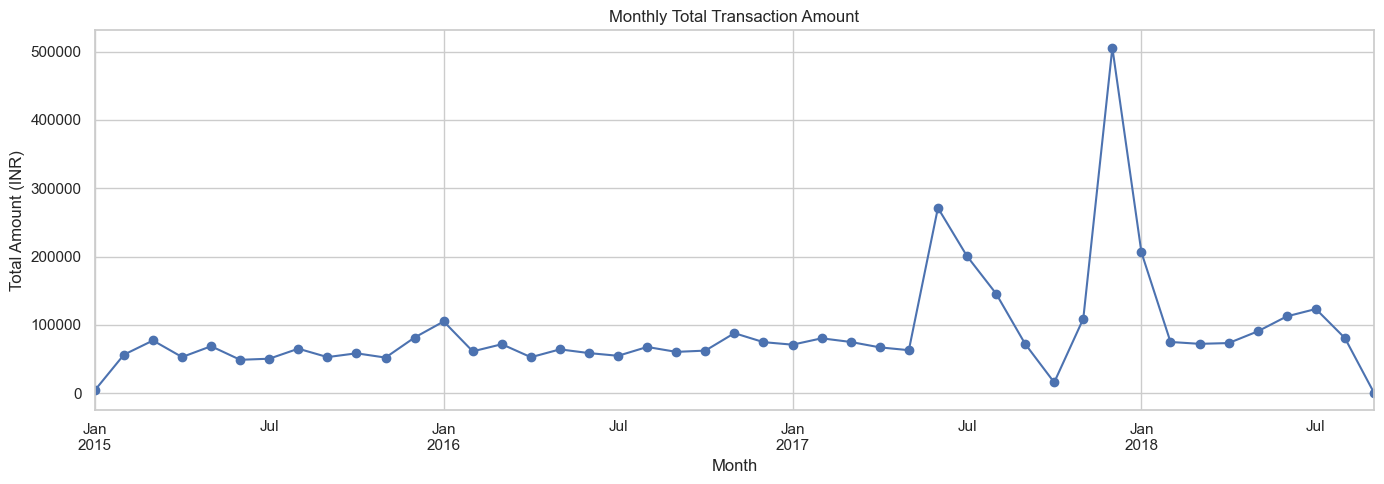

C:\Users\user\AppData\Local\Temp\ipykernel_10420\523270661.py:168: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income = df_income["Amount"].resample("M").sum()
C:\Users\user\AppData\Local\Temp\ipykernel_10420\523270661.py:169: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expense = df_expense["Amount"].resample("M").sum()


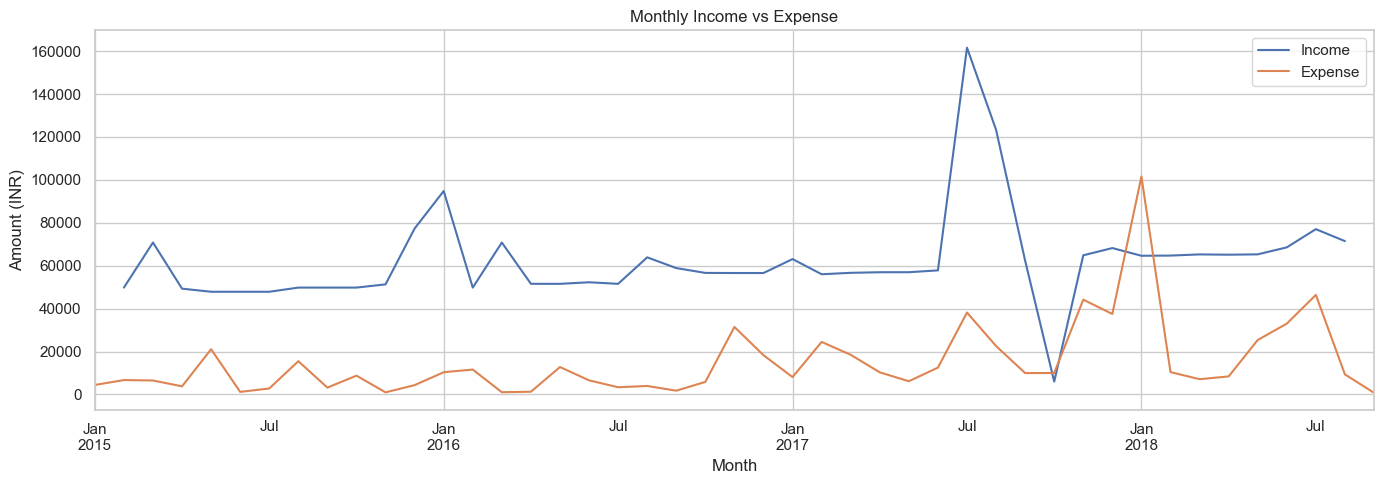

In [3]:
# 1. Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid")

# Load dataset (ensure the CSV file is in the same directory or give full path)
file_path = "Downloads/Daily Household Transactions.csv"
df = pd.read_csv(file_path)

print("Original shape:", df.shape)
print(df.head())
print(df.info())
print(df.isna().sum())

# 2. Data Cleaning
# -------------------------------------------------
# 2.1 Correct data types

# Convert Date column to datetime (day-first format)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)

# Convert Amount to numeric
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# 2.2 Handle missing values
# For this dataset, Amount and Date are critical; drop rows where they are missing.
df = df.dropna(subset=["Date", "Amount"])

# Subcategory and Note are descriptive, so we can either leave them as NaN,
# or fill with a placeholder if you prefer:
df["Subcategory"] = df["Subcategory"].fillna("Unknown")
df["Note"] = df["Note"].fillna("No Note")

# 2.3 Remove duplicate rows
before_dups = df.shape[0]
df = df.drop_duplicates()
after_dups = df.shape[0]
print("Duplicates removed:", before_dups - after_dups)
print("Cleaned shape:", df.shape)

# 3. Exploratory Data Analysis (EDA)
# -------------------------------------------------
# 3.1 Summary statistics
print("\nSummary statistics (numeric):")
print(df.describe())

print("\nSummary statistics (including categoricals):")
print(df.describe(include="all"))

# 3.2 Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: log-scale plot to see small vs large transactions more clearly
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df["Amount"]), bins=50, kde=True)
plt.title("Log Distribution of Transaction Amounts (log1p)")
plt.xlabel("log1p(Amount)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3.3 Transaction counts by category
category_counts = df["Category"].value_counts()
print("\nTransaction counts by Category:")
print(category_counts)

plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar")
plt.title("Transaction Counts by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3.4 Transaction counts by Income/Expense type (if column exists)
if "Income/Expense" in df.columns:
    type_counts = df["Income/Expense"].value_counts()
    print("\nTransaction counts by Income/Expense:")
    print(type_counts)

    plt.figure(figsize=(6, 4))
    type_counts.plot(kind="bar")
    plt.title("Transaction Counts by Income/Expense")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Category vs Income/Expense heatmap
    cat_type = pd.crosstab(df["Category"], df["Income/Expense"])
    plt.figure(figsize=(12, 8))
    sns.heatmap(cat_type, annot=False, cmap="Blues")
    plt.title("Transaction Counts by Category and Type")
    plt.xlabel("Income/Expense")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()

# 4. Correlation Analysis
# -------------------------------------------------
# Encode Category as categorical codes for correlation with Amount
df["Category_Code"] = df["Category"].astype("category").cat.codes

corr_value = df["Category_Code"].corr(df["Amount"])
print("\nCorrelation between Category (coded) and Amount:", corr_value)

# Boxplot of Amount by Category to visually inspect differences
plt.figure(figsize=(14, 6))
# Optionally limit to top N frequent categories for readability
top_cats = df["Category"].value_counts().head(10).index
sns.boxplot(
    data=df[df["Category"].isin(top_cats)],
    x="Category",
    y="Amount"
)
plt.title("Transaction Amounts by Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Amount (INR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5. Time Series Analysis
# -------------------------------------------------
# Ensure Date is the index for time series operations
df_ts = df.set_index("Date").sort_index()

# 5.1 Daily trend (sum of Amount by day)
daily_amount = df_ts["Amount"].resample("D").sum()

plt.figure(figsize=(14, 5))
daily_amount.plot()
plt.title("Daily Total Transaction Amount")
plt.xlabel("Date")
plt.ylabel("Total Amount (INR)")
plt.tight_layout()
plt.show()

# 5.2 Monthly trend (sum of Amount by month)
monthly_amount = df_ts["Amount"].resample("M").sum()

plt.figure(figsize=(14, 5))
monthly_amount.plot(marker="o")
plt.title("Monthly Total Transaction Amount")
plt.xlabel("Month")
plt.ylabel("Total Amount (INR)")
plt.tight_layout()
plt.show()

# 5.3 Optional: separate trends for Income vs Expense if column exists
if "Income/Expense" in df.columns:
    # Create separate series for Income and Expense
    df_income = df_ts[df_ts["Income/Expense"] == "Income"]
    df_expense = df_ts[df_ts["Income/Expense"] == "Expense"]

    monthly_income = df_income["Amount"].resample("M").sum()
    monthly_expense = df_expense["Amount"].resample("M").sum()

    plt.figure(figsize=(14, 5))
    monthly_income.plot(label="Income")
    monthly_expense.plot(label="Expense")
    plt.title("Monthly Income vs Expense")
    plt.xlabel("Month")
    plt.ylabel("Amount (INR)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Optional: Save cleaned data and key summaries
# -------------------------------------------------
# df.to_csv("cleaned_Daily-Household-Transactions.csv", index=False)
# daily_amount.to_csv("daily_trend_amount.csv", header=["Total_Amount"])
# monthly_amount.to_csv("monthly_trend_amount.csv", header=["Total_Amount"])
# print("\nCleaned dataset and trend CSVs saved.")
